In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy.stats
from augur.utils import json_to_tree
tree_file = '../../../../nextstrain-build/phylogenetic_only_camels/auspice/mers.json'
#read in the tree
with open(tree_file, 'r') as f:
    tree_json = json.load(f)
african_countries = ["Ethiopia", "Kenya", "Egypt", "Nigeria", "Burkina Faso", "Morocco", "Tunisia"]

#put tree in Bio.phylo format
tree = json_to_tree(tree_json)
all_muts_by_node = {}
for node in tree.find_clades(): 
    if node.name not in all_muts_by_node:
            all_muts_by_node[node.name] = {}
    muts = node.branch_attrs.get('mutations', {})   
    for gene, mutations in muts.items():
        
        if gene not in all_muts_by_node[node.name]:
            all_muts_by_node[node.name][gene] = []
        
        for m in mutations:
            all_muts_by_node[node.name][gene].append(m)

african_muts_per_gene = {}
asian_muts_per_gene = {}
for node in tree.find_clades(terminal=True):
    country = node.node_attrs.get('country', {})
    # if country['value'] in african_countries:
    #     muts_per_gene[node.name] = {'region': 'Africa'} 
    # else:
    #     muts_per_gene[node.name] = {'region': 'Asia'} 
    path = tree.get_path(node)
    for path_node in path:
        for gene, mutations in all_muts_by_node.get(path_node.name, {}).items():
            if gene == 'nuc':
                continue
            elif gene == 'Spike':
                continue
            elif gene == 'Orf1a' or gene == 'ORF1a':
                continue
            elif gene == 'Orf1b' or gene == 'ORF1b':
                continue
            if country['value'] in african_countries:
                if gene not in african_muts_per_gene:
                    african_muts_per_gene[gene] = {}
                for m in mutations:
                    if m[-1] != '-':
                        if m not in african_muts_per_gene[gene]:
                            african_muts_per_gene[gene][m] = 1
                        else:
                            african_muts_per_gene[gene][m] += 1
            else:
                if gene not in asian_muts_per_gene:
                    asian_muts_per_gene[gene] = {}
                for m in mutations:
                    if m[-1] != '-':
                        if m not in asian_muts_per_gene[gene]:
                            asian_muts_per_gene[gene][m] = 1
                        else:
                            asian_muts_per_gene[gene][m] += 1
print(asian_muts_per_gene['2Omethyltransferase'])
print(african_muts_per_gene["2Omethyltransferase"])

{'Q277H': 1, 'F112L': 1, 'H9Y': 1, 'G121S': 15, 'I128M': 14}
{'E144D': 2, 'G222D': 1, 'P258S': 2, 'T91I': 11, 'E102D': 2, 'A10S': 5, 'A162S': 6, 'T235I': 3, 'A28V': 4, 'R38C': 11, 'H9R': 1}


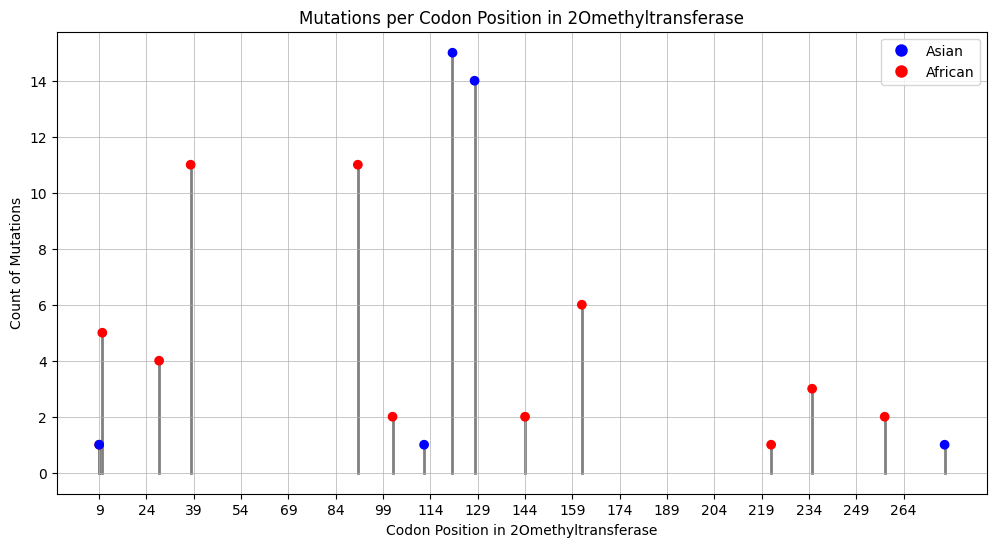

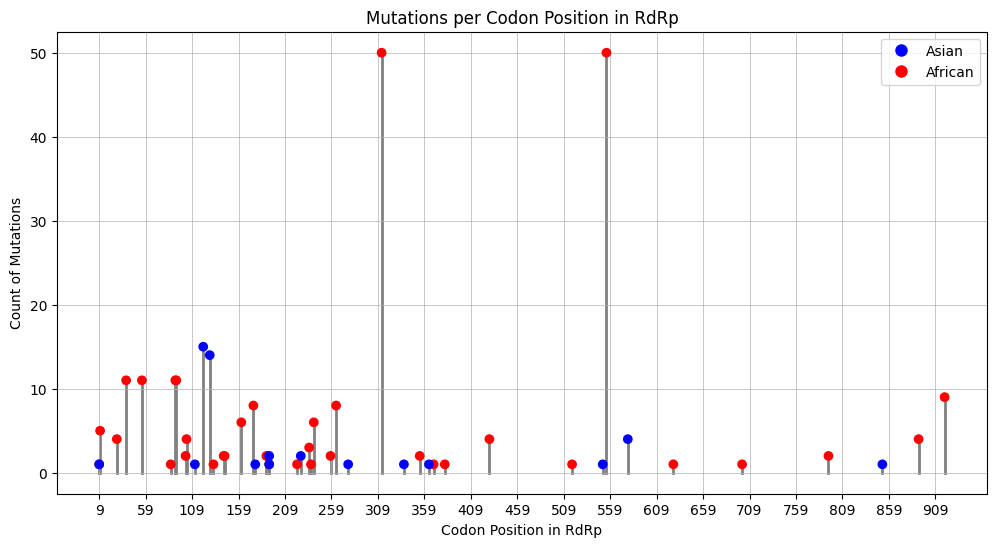

In [30]:
positions = []
counts = []
colors = []
genes = ["2Omethyltransferase", "RdRpb"]
for gene in genes:
    for mut, count in african_muts_per_gene[gene].items():
        pos = int(mut[1:-1])
        positions.append(pos)
        counts.append(count)
        colors.append('red')
    for mut, count in asian_muts_per_gene[gene].items():
        pos = int(mut[1:-1])
        positions.append(pos)
        counts.append(count)
        colors.append('blue') 

    plt.figure(figsize=(12, 6))
    plt.scatter(positions, counts, c=colors, zorder=2)
    if gene == "2Omethyltransferase":
        plt.xticks(np.arange(min(positions), max(positions), 15))
    else:
        plt.xticks(np.arange(min(positions), max(positions), 50))

    plt.grid(True, which='both', linestyle='-', linewidth=0.5)


    # Adding lines connecting each dot to their corresponding x position
    for x, y in zip(positions, counts):
        plt.plot([x, x], [0, y], color='gray', linestyle='solid', linewidth=2, zorder=1)

    # Adding legend 
    blue_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Asian')
    red_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='African')
    plt.legend(handles=[blue_patch, red_patch])
    if gene == "RdRpb":
        plt.xlabel('Codon Position in RdRp')
        plt.ylabel('Count of Mutations')
        plt.title('Mutations per Codon Position in RdRp')
    else:
        plt.xlabel('Codon Position in ' + gene)
        plt.ylabel('Count of Mutations')
        plt.title('Mutations per Codon Position in ' + gene)

    plt.show()